# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [5]:
# Put your EDA code here
north_df.head()
south_df.head()
print("1)")
print("north: " + str(len(pd.unique(north_df['Rep ID']))))
print("south: " + str(len(pd.unique(south_df['Rep ID']))))

print("2)")
print("north:")
print("avg busy minutes: " + str(north_df['Busy Minutes'].mean()))
print("avg not ready minutes: " + str(north_df['Not Ready Minutes'].mean()))
print("avg incoming wait time: " + str(north_df['Incoming Wait Time'].mean()))
print("avg during call wait time: " + str(north_df['During Call Wait Time'].mean()))
print("south:")
print("avg busy minutes: " + str(south_df['Busy Minutes'].mean()))
print("avg not ready minutes: " + str(south_df['Not Ready Minutes'].mean()))
print("avg incoming wait time: " + str(south_df['Incoming Wait Time'].mean()))
print("avg during call wait time: " + str(south_df['During Call Wait Time'].mean()))


1)
north: 9
south: 11
2)
north:
avg busy minutes: 9.987755102040817
avg not ready minutes: 1.9142857142857144
avg incoming wait time: 3.048780487804878
avg during call wait time: 2.9673469387755103
south:
avg busy minutes: 10.054140127388536
avg not ready minutes: 1.910828025477707
avg incoming wait time: 3.0
avg during call wait time: 3.0764331210191083


In [7]:
north_df.groupby("Time Block").size()
south_df.groupby("Time Block").size()

Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
#Nine reps at the north branch and eleven for the south branch.
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
#The average busy minutes: North- 9.987755 South:10.05414, Not ready: North-1.914286 South:1.910828,Incoming wait time: North-3 #South-3,During call wait time: North-2.967347 South-3.
3.What is the number of calls taken for each time block? 
North-
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5, 
South-
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [5]:
north_df[(north_df["Incoming Wait Time"].isnull()) & (north_df["Incoming or Outgoing"] != "Outgoing")]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [6]:
north_df.Sale=north_df.Sale.str.strip()
north_df.Sale.value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [8]:
north_df[north_df.duplicated()]
south_df[south_df.duplicated()]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [9]:
clean_north_df = north_df.drop("Branch", axis=1)
clean_north_df = clean_north_df.drop("Calls", axis=1)

clean_north_df
clean_south_df = south_df.drop("Branch", axis=1)
clean_south_df = clean_south_df.drop("Calls", axis=1)

clean_south_df

,Unnamed: 0,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,1,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,2,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,3,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,4,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3
241,241,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2
242,242,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2
243,243,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes I found in both data sets that the null data was due to out going calls.
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I removed the spaces in the column so that the two nearly identical YES values were consolidated.
3. Are there duplicates in the two data sets? If there are, how did you handle them?
I found no duplicates in both data sets,when using all columns for comparison
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
Yes I found in both data sets that "Calls" & "Branch" column were unnecessary.Calls because it is always one,and I can count the rows instead. Branch because I already know what branch each dataframe is for. I handled it by dropping the columns and creating a new data frame.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [10]:
# Manipulate data here
df = pd.concat([north_df,south_df])
df

north_reps=north_df.groupby("Rep ID")["Calls"].sum().sort_values(ascending=False).head() 
north_reps
south_reps=south_df.groupby("Rep ID")["Calls"].sum().sort_values(ascending=False).head() 
south_reps

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Name: Calls, dtype: int64

In [12]:
print(north_df.Abandoned.mean())
print(south_df.Abandoned.mean())
print(df.Abandoned.mean())

0.02857142857142857
0.012738853503184714
0.01967799642218247


In [16]:
north_df["Incoming Wait Time"].dropna().mean()

less_than_two=north_df[north_df["Incoming Wait Time"]<=2].Calls.count()  
total=north_df.Calls.count()
print("north service level "+ str(less_than_two/total))


south_df["Incoming Wait Time"].dropna().mean()

less_than_two=south_df[south_df["Incoming Wait Time"]<=2].Calls.count()  
total=south_df.Calls.count()
print("south service level "+ str(less_than_two/total))

df["Incoming Wait Time"].dropna().mean()

less_than_two=df[df["Incoming Wait Time"]<=2].Calls.count()  
total=df.Calls.count()
print("company wide service level "+str (less_than_two/total))

north service level 0.1346938775510204
south service level 0.15286624203821655
company wide service level 0.1449016100178891


In [18]:
north_df["Incoming Wait Time"].mean()
south_df["Incoming Wait Time"].mean()
df["Incoming Wait Time"].mean()

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
North: Brent 37, South:Eric 35.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
North abandoned calls-0.02857142857142857, South abandoned calls-0.012738853503184714, Company wide combain abandoned calls-0.01967799642218247. Yes, the south branch and company wide fall below the optimal range.  
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
Company wide-14%, North-13%, South-15%. 
4. For each branch and the entire company, what is the average speed of answer?

company wide incoming wait times
3.019230769230769

north incoming wait times
3.048780487804878

south incoming wait times
3.0


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

<BarContainer object of 4 artists>

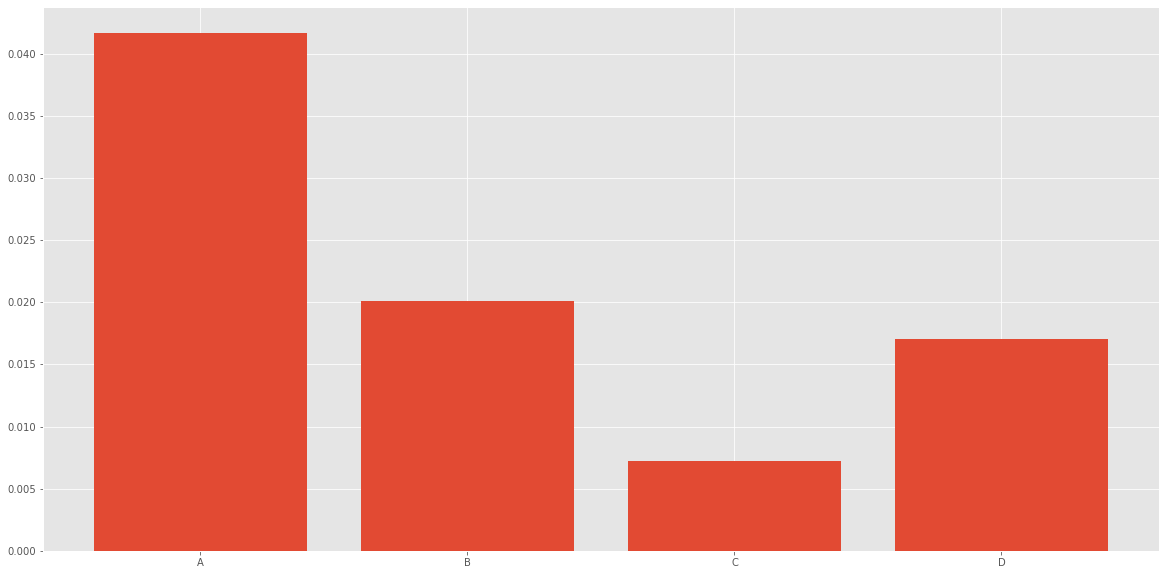

In [12]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

plt.bar(queues,abandonment_rates.values())



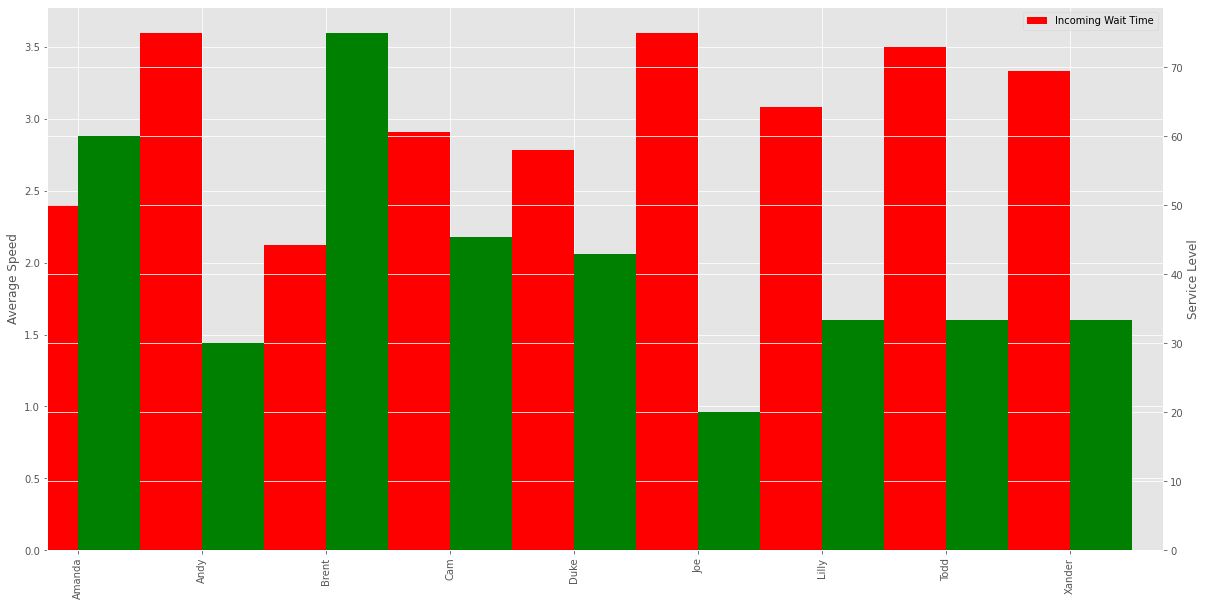

In [13]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
north_plt.plot(kind="bar",color="red", ax=ax, position=1)
service_level["Service Level %"].plot(kind="bar", color="green", ax=ax2, position=0)
ax.set_ylabel("Average Speed")
ax2.set_ylabel("Service Level")
plt.show()

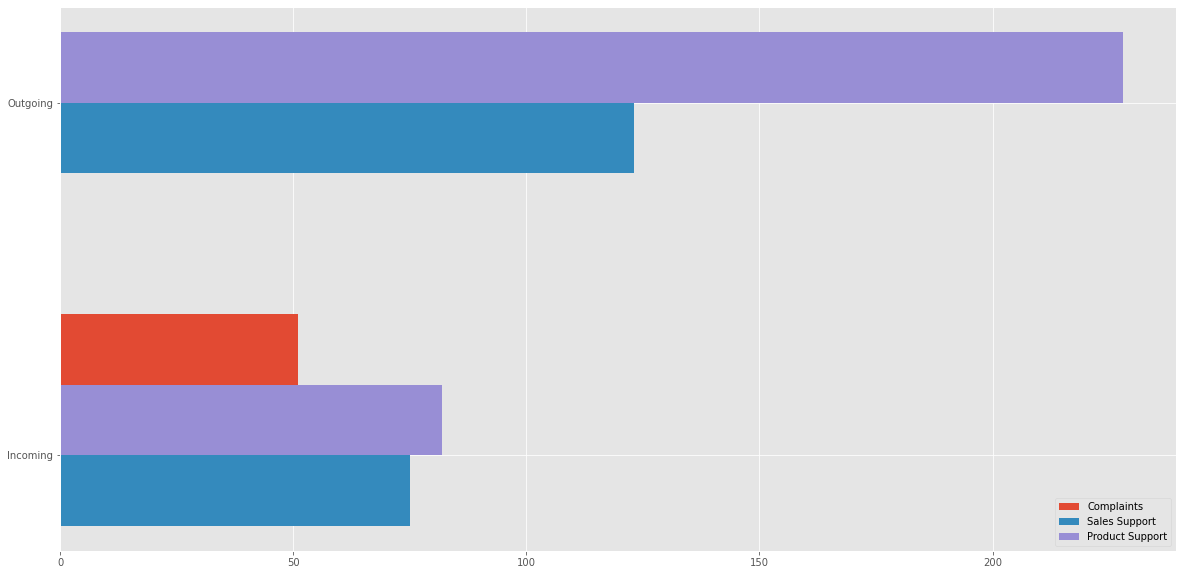

In [20]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group=df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#fig, (ax1,ax2,ax3)=plt.subplot(1,2,figsize=(12,5))
plt.barh(list(complaints.keys()),complaints.values(),height=0.4,align="edge", label="Complaints")
plt.barh(list(sales_support.keys()),sales_support.values(),height=-0.2,align="edge", label="Sales Support")
plt.barh(list(product_support.keys()),product_support.values(),height=0.2,align="edge", label="Product Support")
#plt.set_yticks(["Incoming","Outgoing"])
#plt.set_ylabel("Incoming or Outgoing")
plt.legend()


plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

1.I used a bar chart to show what is the average abandonment rate per queue becuase bar charts are great for comparing data in a group setting. Showing each queue as a bar and the rate as the y axis make this comparison clear.

2.I used a two axis bar chart as this easily showed the comparasion for each rep.Having one axis/bar for the "Good measurment" of service level in green, and the other "Bad measurement" of average speed to answer in red, shows the reps performance all in one place.

3.I used a horizontal bar graph to show incoming verus outgoing. Having a bar indicating each of the call types clearly shows this comparison. horizontal bar graphs are good way to present data with long labels.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? 

Using average abandonment rate, the south branch is lower, lower seems to be better.For service level, the south branch also appears to be doing better. The average speed of answer was also better for the south branch, but barely. Overall, the two brances appear to be operating at the same level. However, this seems too be due to Brent pulling the North branch's numbers up.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

I would have say due to service level, and other KPI'S (I have worked in call centers for 10 years.) , the north branch could benefit from extra help. 

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis? 

I wish we had customer feedback surveys that relate to the reps.I think there is a missing factor to judging efficiency in a call center, which is customer satisfaction. If the customer feels that there issue wasn't resloved then they are more than likely going to call back in which creates unnecessary further work for the centers reps.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
